# 1) Digit recognition


Given the following 'mnist' dataset and the matrices with the test and the training  as below:

In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [38]:
f = open("mnist_test_10.csv", 'r')
m_test = f.readlines()
f.close()

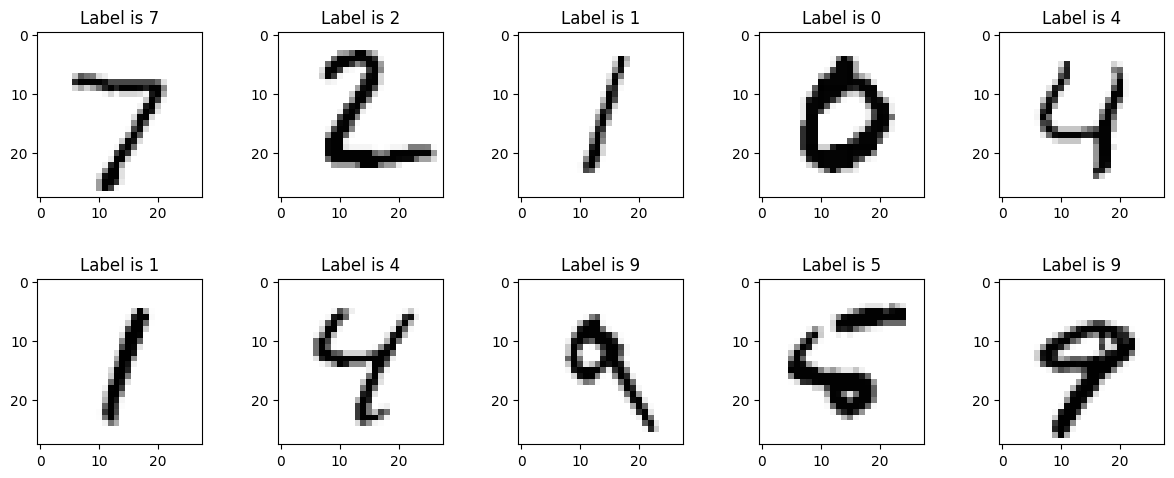

In [39]:
fig = plt.figure(figsize=(15,15));
count=1
ncol_img = 28
nrow_img = 28
col_test = len(m_test)
row_test= ncol_img*nrow_img
test_array = np.zeros( (row_test,col_test) )
test_lab = np.zeros((row_test,1))
ik=0
for line in m_test:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((ncol_img,nrow_img))
    test_array[:,ik] = imarray.reshape(row_test)
    test_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(5,5,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

In [40]:
f = open("mnist_train_100.csv", 'r')
m_train = f.readlines()
f.close()

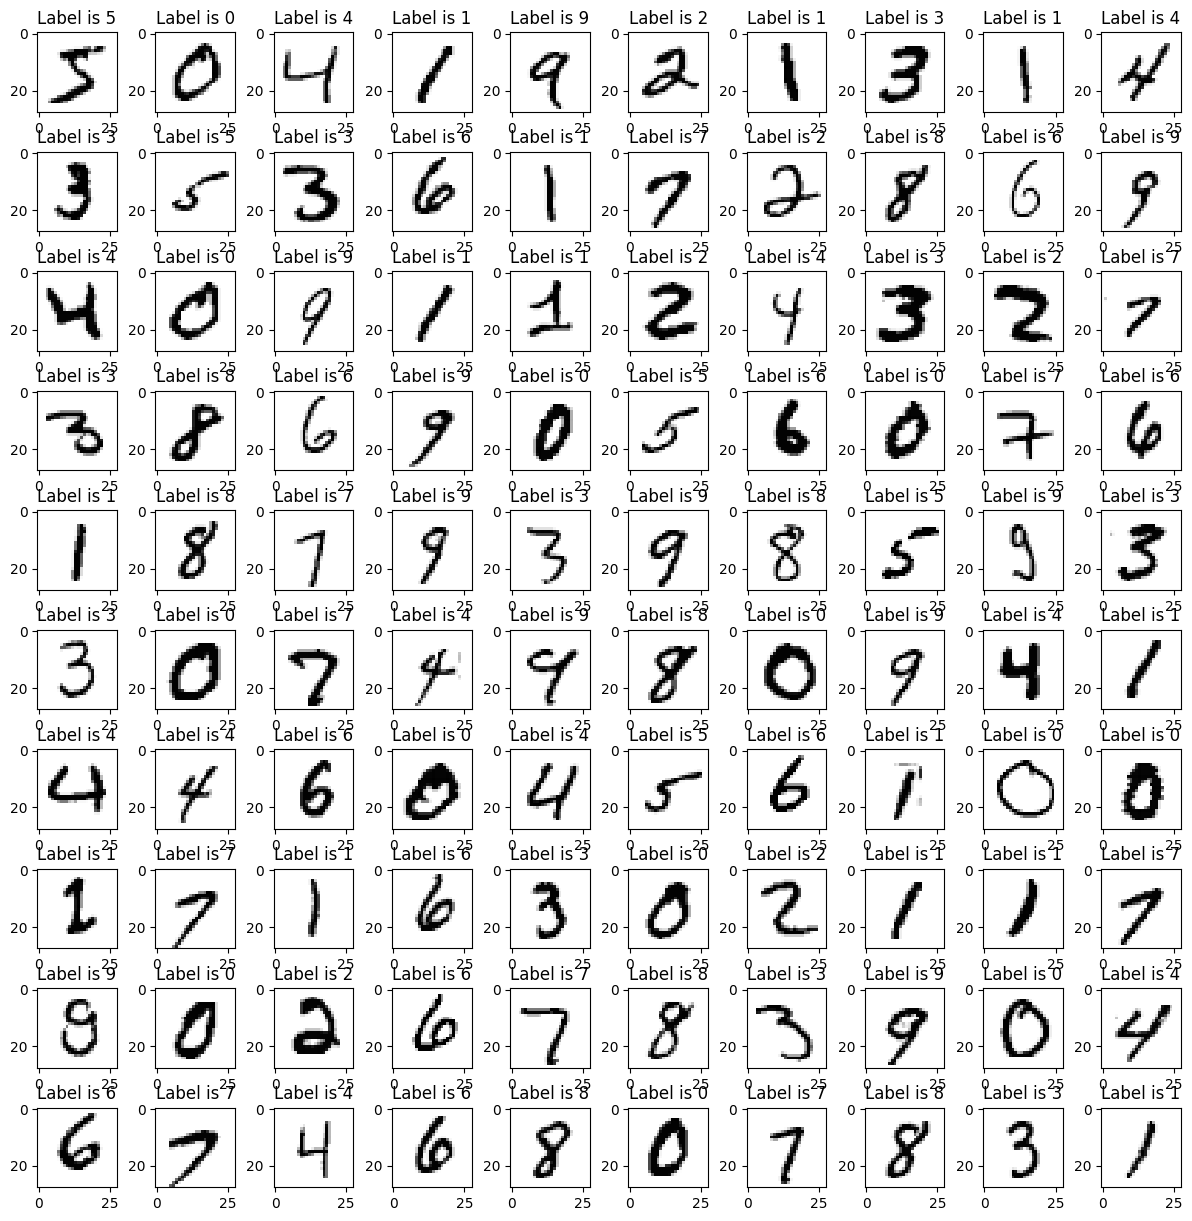

In [41]:
fig = plt.figure(figsize=(15,15));
count = 1
ncol_img = 28
nrow_img = 28
col_train = len(m_train)
row_train= ncol_img*nrow_img
train_array = np.zeros( (row_train,col_train) )
train_lab = np.zeros((row_train,1))
ik = 0

for line in m_train:
    lab_img = line.split(',')
    imarray = np.asfarray(lab_img[1:]).reshape((28,28))
    train_array[:,ik] = imarray.reshape(row_train)
    train_lab[ik] = np.asarray(lab_img[0])
    ik = ik+1
    plt.subplot(10,10,count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.title("Label is " + lab_img[0])
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    pass

- Compute the mean-image of the training images and subtract it from all the other images, denote the obtained matrix by ``AM``.  Since ``AM`` columns have mean different from zero, make sure to center the data and name the new matrix ``AMC``.

In [42]:
(rows_train, columns_train) = train_array.shape

imgAsum = np.sum(train_array, axis=1)/columns_train
e = np.ones((1, columns_train))
AM = train_array-np.dot(imgAsum.reshape(rows_train, 1), e)
AMC = AM - np.mean(AM, axis=0)

Then apply the SVD to ``AMC``  by using ``scipy.linalg.svd`` using ``full_matrices = False``. 

Choose a $k$ value and select a subspace of the range of ``AMC``having dimension $k$ by suitable selecting an orthogonal basis. 

(784, 16)

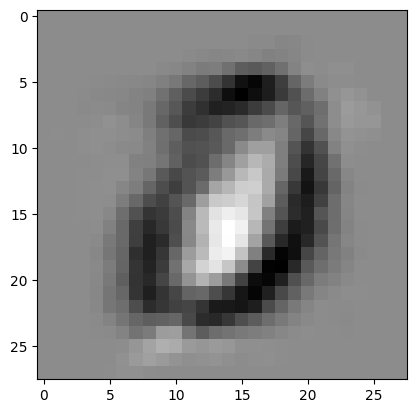

In [43]:
U, s, V = np.linalg.svd(AMC, full_matrices  = False)

k = 16
U_k = U[:,:k]
U_k


whiten = True
ncomp = 30
pca = PCA(copy=True,n_components=ncomp,whiten=True).fit(AMC)
IM_pca = pca.transform(AMC)
IM_pca = IM_pca/np.sqrt(rows_train) #To make sure that the columns are orthogonal
plt.imshow(IM_pca[:,0].reshape(28,28),cmap='gray')

U_k.shape

For each digit in the training-set compute its class, that is the mean of the coordinates of the projection in the selected subspace. 

In [44]:
PT1 = test_array[:,9]-imgAsum
mPT1 = np.mean(PT1)
PT1 = PT1-np.mean(PT1)
Ptest = np.dot( IM_pca.T,PT1)

Cli = {}
for i in range(1,10):
    Cli[i]=[]
for i in range(1,10):
     for j in range(10):
       PT1=(imarray).reshape(ncol_img*nrow_img)-imgAsum
       mPT1=np.mean(PT1)
       PT1=PT1-np.mean(PT1)
       Pimg=np.dot( IM_pca.T,PT1)
       Cli[i].append(Pimg)
     Cli[i]=np.asarray(Cli[i])
        
Cli[1].shape    
om = {}
for i in range(1,10):
    om[i]=np.mean(Cli[i],axis=0)
    print(om[i])   

[ 800.99039544 -288.41436956  199.81017266  259.06737636 -489.23900569
   60.42616888   88.56007738 -184.95623831 -263.97706479   60.80560802
  250.47645063  113.75911305  229.27247162  -36.14266206  -36.46056963
  188.91296914  -45.42277514 -170.04043043 -208.42184775  110.95757605
  111.09032304  -71.15313511  -17.37888621 -190.6896891  -124.61199087
  -30.16523038   84.47614894   68.53961266  -68.41450779    9.3633624 ]
[ 800.99039544 -288.41436956  199.81017266  259.06737636 -489.23900569
   60.42616888   88.56007738 -184.95623831 -263.97706479   60.80560802
  250.47645063  113.75911305  229.27247162  -36.14266206  -36.46056963
  188.91296914  -45.42277514 -170.04043043 -208.42184775  110.95757605
  111.09032304  -71.15313511  -17.37888621 -190.6896891  -124.61199087
  -30.16523038   84.47614894   68.53961266  -68.41450779    9.3633624 ]
[ 800.99039544 -288.41436956  199.81017266  259.06737636 -489.23900569
   60.42616888   88.56007738 -184.95623831 -263.97706479   60.80560802
  25

Determine to which class every digit of the test-set belongs to by computing the minimal 2-norm distance.

In [45]:
predicted_classes = np.zeros(test_array.shape[1])

for i in range(test_array.shape[1]):
    
    test_img = test_array[:, i]
    test_img = test_img - imgAsum
    
    test_img_projected = np.dot(IM_pca.T, test_img)
    min_distance = float('inf')
    
    predicted_class = None
    
    for j in range(1, 10):
        distance = np.linalg.norm(test_img_projected - om[j], 2)
        
        if distance < min_distance:
            
            min_distance = distance
            predicted_class = j

    predicted_classes[i] = predicted_class


- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the digit.

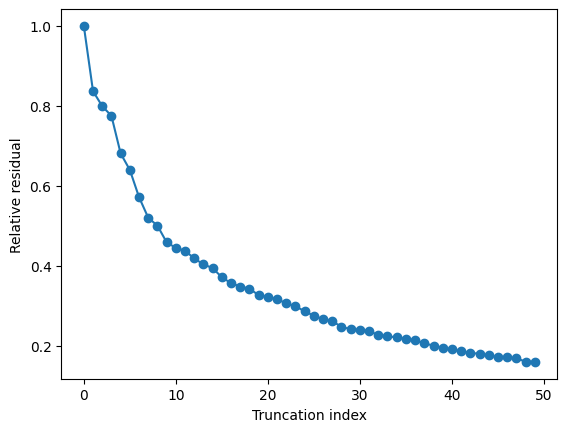

In [46]:
res = np.zeros((50,1))
n = np.linalg.norm(AMC,2)

for i in range(0,50):
    xT = np.dot(V[0:i,:].T,(np.dot( AMC.T, U[:,0:i])/s[0:i]).T)
    res[i] = np.linalg.norm( np.dot(AMC,xT)-AMC,2)/n

plt.plot(res,'-o')
plt.xlabel('Truncation index')
plt.ylabel('Relative residual')
plt.show()

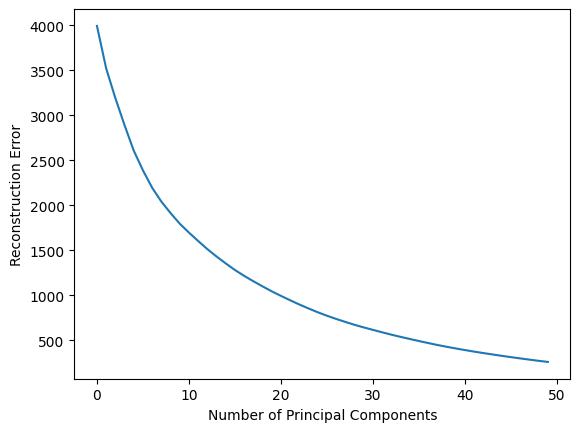

In [47]:
from sklearn.metrics import mean_squared_error
errors = []

for k in range(0, 50):
    Uk = U[:,:k]
    sk = s[:k]
    Vk = V[:k,:]

    AMC_reconstructed = np.dot(Uk*sk, Vk)
    
    error = mean_squared_error(AMC, AMC_reconstructed)
    errors.append(error)

plt.plot(errors)
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error")
plt.show()



- Classify all the digits in the testset and compute the confusion matrix. That is the matrix where, for each digit i, the element of index i,j contains the number of observations known to be in group i and predicted to be in group j. Use ``sklearn.metrics.confusion_matrix`` and compute also  the classification report using ``sklearn.metrics.classification_report``.

# 2) Minimum of bivariate function

Use the steepest descend method and the Newton method  to approximate  the minimum (${\bf x}^{\star}=(1,1)^{T}$) of the function:
$$f({\bf x})=\frac{1}{2} 0.001(x_1-1)^2+(x_1^2-x_2)^2.$$

Compare the approximations computed by the two methods plotting:

1) the evaluation of the objective function at the vectors generated by the numerical methods;


2) the convergence order $p$ of the numerical scheme can be calculated with 
$$log \left(\frac{\|{\bf x}_{k}-{\bf x}^{\star}\|}{\|{\bf x}_{k+1}-{\bf x}^{\star}\|}\right)/ log \left(\frac{\|{\bf x}_{k-1}-{\bf x}^{\star}\|}{\|{\bf x}_k-{\bf x}^{\star}\|}\right)\approx p $$ for all $k >> 1$.

Use the same starting point and as stopping criterion: 

$$
\| \nabla f({\bf x}_k)\|_2< 10^{-4}
$$


Definisco la funzione

In [48]:
def f(x, y):
    return 0.5*0.001*(x - 1)**2 + (x*x - y)**2

Definisco la funzione per il calcolo del gradiente

In [49]:
def grad(func, x, y):
    h = 1e-4
    grad_x = (func(x+h, y) - func(x-h, y)) / (2*h)
    grad_y = (func(x, y+h) - func(x, y-h)) / (2*h)
    return np.array([grad_x, grad_y])

Definisco la funzione per il calcolo della matrice Hessiana

In [50]:
def hessian(func, x, y):
    h = 1e-4
    hessian = np.zeros((2, 2))
    hessian[0, 0] = (func(x+h, y) + func(x-h, y) - 2*func(x, y)) / (h*h)
    hessian[1, 1] = (func(x, y+h) + func(x, y-h) - 2*func(x, y)) / (h*h)
    hessian[0, 1] = (func(x+h, y+h) + func(x-h, y-h) -
                     func(x+h, y-h) - func(x-h, y+h)) / (4*h*h)
    hessian[1, 0] = hessian[0, 1]
    return hessian


Metodo di Newton

In [51]:
def newton(func, x0, y0, max_iter ,tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        H = hessian(func, x, y)
        inv_H = np.linalg.inv(H)
        x -= inv_H[0, 0] * grad_x + inv_H[0, 1] * grad_y
        y -= inv_H[1, 0] * grad_x + inv_H[1, 1] * grad_y
        if abs(grad_x) < tol and abs(grad_y) < tol:
            break
    return np.array([x, y])

Steepest descent

In [52]:
def steepest_descent(func, x0, y0, max_iter, learning_rate=0.01, tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        if abs(grad_x) < tol and abs(grad_y) < tol:
            break
    return np.array([x, y])

Eseguo i metodi

In [53]:
x = 1
y = 1

steepest_results = steepest_descent(f, x, y, 100)
print(steepest_results)

newton_results = newton(f ,x ,y, 100)
print(newton_results)

[1. 1.]
[0.99996 0.99992]


Valutazione del metodo di Newton e steepest descent

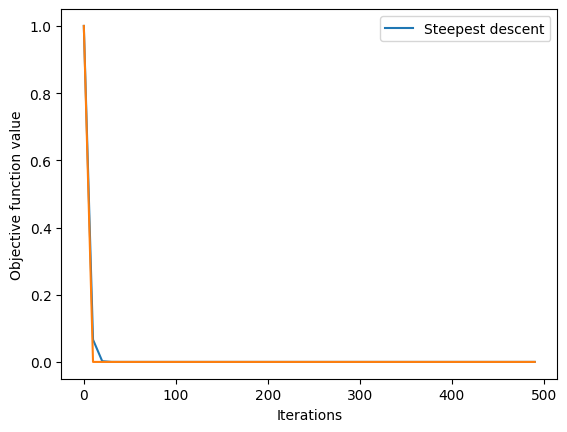

In [54]:
x0 = 1
y0 = 2

x_values = [x0]
y_values = [y0]
z_values = [f(x0,y0)]
it = [0]

x_values_newton = [x0]
y_values_newton = [y0]
z_values_newton = [f(x0, y0)]

for i in range(10, 500, 10):
    # Steepest descent
    sd_x, sd_y = steepest_descent(f, x0, y0, i)
    n_x, n_y = newton(f, x0, y0, i)

    x_values.append(sd_x)
    y_values.append(sd_y)
    z_values.append(f(sd_x, sd_y))
    
    x_values_newton.append(n_x)
    y_values_newton.append(n_y)
    z_values_newton.append(f(n_x, n_y))
    
    it.append(i)



# Plot the results
plt.plot(it, z_values,  label='Steepest descent')
plt.plot(it, z_values_newton)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.show()


Newton: Use the same starting point and as stopping criterion: (funzione)


In [55]:
def newton(func, x0, y0, max_iter ,tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        H = hessian(func, x, y)
        inv_H = np.linalg.inv(H)
        x -= inv_H[0, 0] * grad_x + inv_H[0, 1] * grad_y
        y -= inv_H[1, 0] * grad_x + inv_H[1, 1] * grad_y
        if np.linalg.norm(grad_x, ord=None, axis=None, keepdims=False) < tol and np.linalg.norm(grad_y, ord=None, axis=None, keepdims=False) < tol:
            break
    return np.array([x, y])

newton_results = newton(f ,x ,y, 100)
print(newton_results)

[0.99996 0.99992]


Steepest descent: Use the same starting point and as stopping criterion: (funzione)

In [60]:
def steepest_descent(func, x0, y0, max_iter, learning_rate=0.01, tol=1e-4):
    x = x0
    y = y0
    for i in range(max_iter):
        grad_x, grad_y = grad(func, x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        if np.linalg.norm(grad_x, ord=None, axis=None, keepdims=False) < tol and np.linalg.norm(grad_y, ord=None, axis=None, keepdims=False) < tol:
            break
    return np.array([x, y])
    
steepest_results = steepest_descent(f, x, y, 100)
print(steepest_results)

[1. 1.]


# 3) Google Page Rank

Consider the following web semplification:

<div>
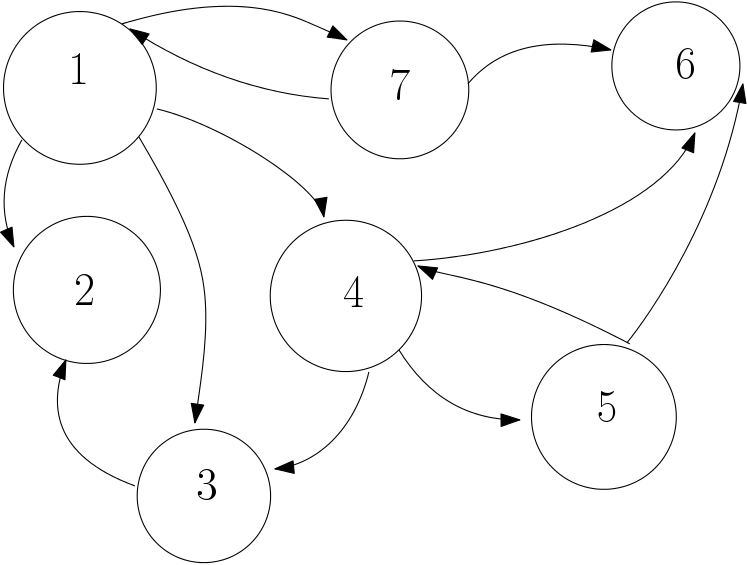
</div>

- Construct the hyperlink matrix $H$ and modify it to handle any dangling node.

In [61]:
H = np.array([
[0, 0, 0, 0, 0, 0, 1/2],
[1/4, 0, 1, 0, 0, 0, 0],
[1/4, 0, 0, 1/3, 0, 0, 0],
[1/4, 0, 0, 0, 1/2, 0, 0],
[0, 0, 0, 1/3, 0, 0, 0],
[0, 0, 0, 1/3, 1/2, 0, 1/2],
[1/4, 0, 0, 0, 0, 0, 0]])

- Construct 3 Google matrices $G_1, G_2, G_3$, by varying the parameter $\alpha = 0.85, 0.90, 0.95$. 

In [62]:
alpha_1 = 0.85
alpha_2 = 0.90
alpha_3 = 0.95
n = 7
G1 = alpha_1*H + (1-alpha_1) / n*np.ones([n, n])
G2 = alpha_2*H + (1-alpha_2) / n*np.ones([n ,n])
G3 = alpha_3*H + (1-alpha_3) / n*np.ones([n, n])
print('\n Google matrix G1 \n', G1)
print('\n Google matrix G2 \n', G2)
print('\n Google matrix G3 \n', G3)


 Google matrix G1 
 [[0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.44642857]
 [0.23392857 0.02142857 0.87142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.23392857 0.02142857 0.02142857 0.3047619  0.02142857 0.02142857
  0.02142857]
 [0.23392857 0.02142857 0.02142857 0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.3047619  0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.3047619  0.44642857 0.02142857
  0.44642857]
 [0.23392857 0.02142857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]]

 Google matrix G2 
 [[0.01428571 0.01428571 0.01428571 0.01428571 0.01428571 0.01428571
  0.46428571]
 [0.23928571 0.01428571 0.91428571 0.01428571 0.01428571 0.01428571
  0.01428571]
 [0.23928571 0.01428571 0.01428571 0.31428571 0.01428571 0.01428571
  0.01428571]
 [0.23928571 0.01428571 0.01428571 0.01428571 0.46428571 0.01428571
  0.01428571]
 [0.01428571 0.01428571 0.01428571 0.31428571 0.0142857

- For every Google matrix compute the ranking of the web pages by using the power method without assuming that the dominant eigenvalue is actually $1$. Hence, also compute the dominant eigenvalue in all the three cases and discuss the obtained results. 

In [63]:
def Page_Rank(u0,A,t,imax):
    i = 1

    y0 = u0/np.linalg.norm(u0)
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))    
    #We use a list also to store the error estimates at every iteration
    e = []
    e.append(1)
    
    while((e[-1]>t) & (i <imax) ):
        temp = zk
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        e.append(np.linalg.norm(temp-zk))
        i = i+1
        
    return zk,i-1,e

z,i,e = Page_Rank(np.array([1,1,1,1,1,1,1]), G1, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])

z,i,r = Page_Rank(np.array([1,1,1,1,1,1,1]), G2, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])

z,i,e = Page_Rank(np.array([1,1,1,1,1,1,1]), G3, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', i)
print('Final accuracy',e[-1])    

Final computed zk 
 [0.19987356 0.61259115 0.3176043  0.33425329 0.24611449 0.53533758
 0.15819678]
Total numebr of iteration 18
Final accuracy 6.924738322954779e-06
Final computed zk 
 [0.16751462 0.63483396 0.3079813  0.32599447 0.23930429 0.54193237
 0.12977901]
Total numebr of iteration 24
Final accuracy 6.924738322954779e-06
Final computed zk 
 [0.11961827 0.65607923 0.29411041 0.31785516 0.23658339 0.55099342
 0.09029521]
Total numebr of iteration 39
Final accuracy 9.891950150149822e-06
